In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization

In [2]:
fpath = r"C:\Users\charishma\Documents\MINIPROJECT\CODE\PlantVillage"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus'] 

No. of categories =  15


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  4352 
No. of labels loaded =  4352
<class 'list'> <class 'list'>


In [4]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (4352, 227, 227, 3) 
Labels shape =  (4352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


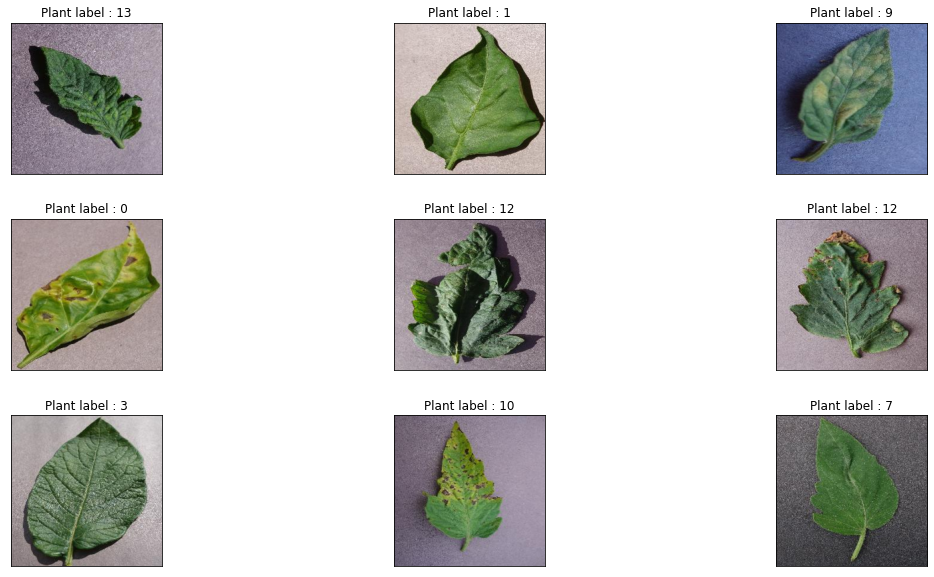

In [5]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

### 3) Prepare data for CNN model training
- Step 1 - shuffle the data loaded from the dataset

In [6]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 4349 4350 4351]

'n' values after shuffling =  [3063 2450 3854 ... 4182 2004 3924]


In [7]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (4352, 227, 227, 3) 
Labels shape after shuffling =  (4352,)


- Step 2 - Data normalization

In [8]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (4352, 227, 227, 3)


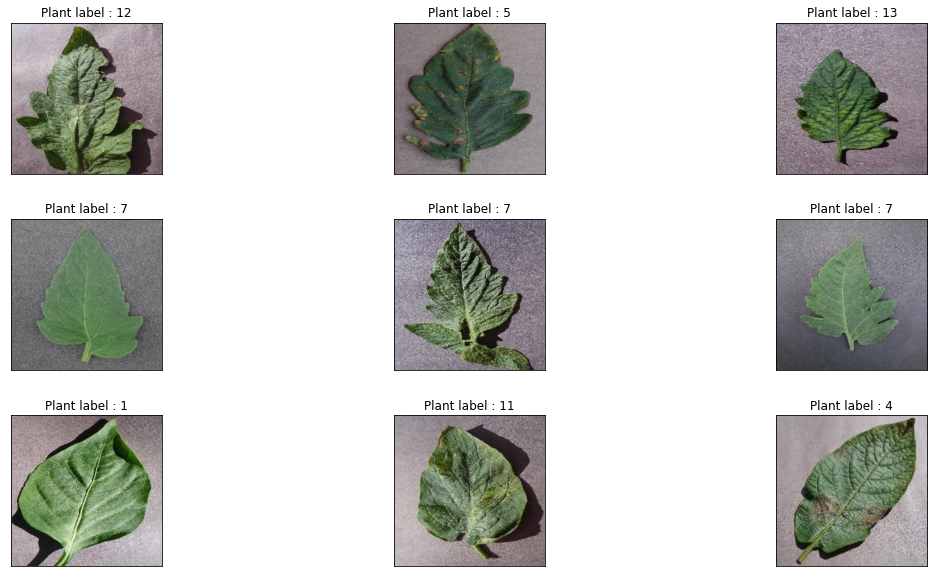

In [9]:
display_rand_images(images, labels)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3481, 227, 227, 3)
y_train shape =  (3481,)

x_test shape =  (871, 227, 227, 3)
y_test shape =  (871,)


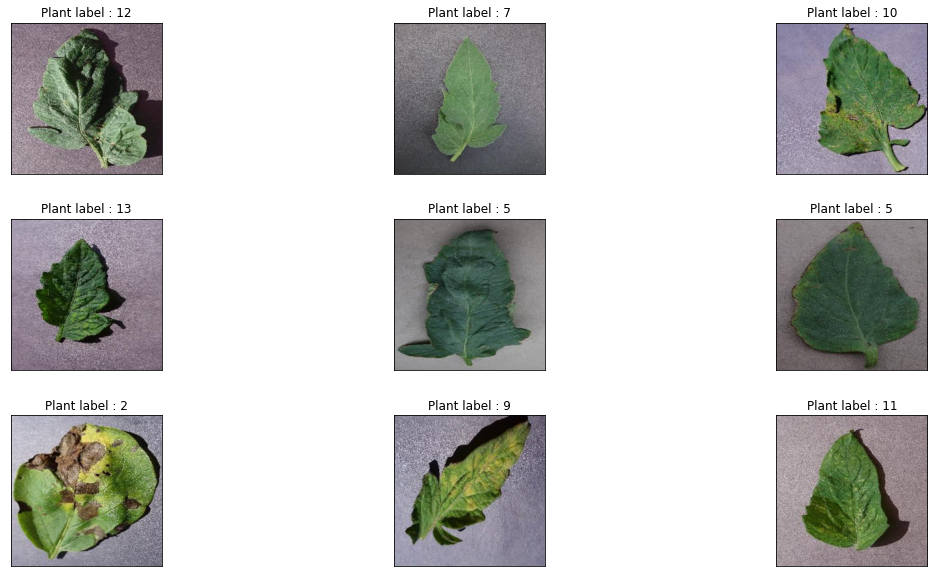

In [11]:
display_rand_images(x_train, y_train)

In [12]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

- Compile the defined CNN model

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
109/109 [==============================] - 152s 1s/step - loss: 2.7031 - accuracy: 0.2695
Epoch 2/100
109/109 [==============================] - 128s 1s/step - loss: 1.8910 - accuracy: 0.4326
Epoch 3/100
109/109 [==============================] - 140s 1s/step - loss: 1.5375 - accuracy: 0.5217
Epoch 4/100
109/109 [==============================] - 135s 1s/step - loss: 1.2915 - accuracy: 0.5829
Epoch 5/100
109/109 [==============================] - 148s 1s/step - loss: 1.1238 - accuracy: 0.6369
Epoch 6/100
109/109 [==============================] - 135s 1s/step - loss: 0.9778 - accuracy: 0.6768
Epoch 7/100
109/109 [==============================] - 138s 1s/step - loss: 0.9073 - accuracy: 0.6989
Epoch 8/100
109/109 [==============================] - 152s 1s/step - loss: 0.7752 - accuracy: 0.7357
Epoch 9/100
109/109 [==============================] - 129s 1s/step - loss: 0.7168 - accuracy: 0.7509
Epoch 10/100
109/109 [==============================] - 128s 1s/step - loss: 0.645

109/109 [==============================] - 164s 2s/step - loss: 0.0938 - accuracy: 0.9693
Epoch 81/100
109/109 [==============================] - 164s 2s/step - loss: 0.0960 - accuracy: 0.9716
Epoch 82/100
109/109 [==============================] - 165s 2s/step - loss: 0.0991 - accuracy: 0.9681
Epoch 83/100
109/109 [==============================] - 166s 2s/step - loss: 0.0872 - accuracy: 0.9713
Epoch 84/100
109/109 [==============================] - 165s 2s/step - loss: 0.0580 - accuracy: 0.9825
Epoch 85/100
109/109 [==============================] - 164s 2s/step - loss: 0.0345 - accuracy: 0.9853
Epoch 86/100
109/109 [==============================] - 166s 2s/step - loss: 0.0266 - accuracy: 0.9908
Epoch 87/100
109/109 [==============================] - 166s 2s/step - loss: 0.0432 - accuracy: 0.9868
Epoch 88/100
109/109 [==============================] - 169s 2s/step - loss: 0.0858 - accuracy: 0.9716
Epoch 89/100
109/109 [==============================] - 165s 2s/step - loss: 0.0545 - 

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

28/28 [==============================] - 20s 343ms/step - loss: 0.9726 - accuracy: 0.8037
0.9725518822669983 0.8036739230155945


In [16]:
pred = model.predict(x_test)

pred.shape

(871, 20)

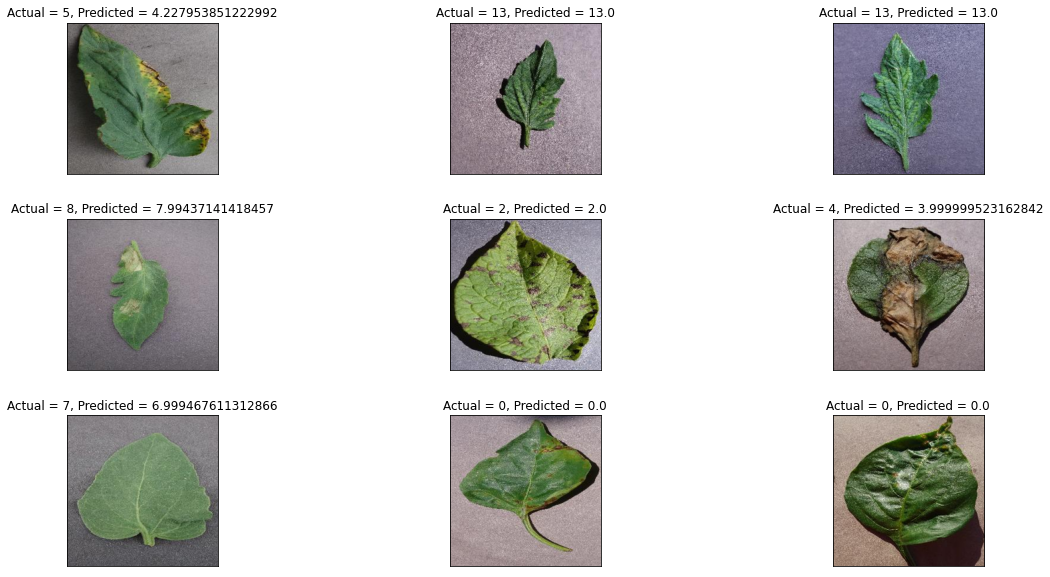

In [17]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()